<a href="https://colab.research.google.com/github/merfurfu/Computer-Vision-Project/blob/vic_work/vicwork_ComputerVisionProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1> <b> Object Classificaiton Using YOLO <b> </h1></center>

## Importing required Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import cv2
import seaborn as sns
import glob
import xml.etree.ElementTree as ET
from PIL import Image
import os
import shutil

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
%cd "/content/drive/MyDrive/Colab Notebooks/Computer Vision"
!ls

/content/drive/MyDrive/Colab Notebooks/Computer Vision
'Computer Vision Idea & Plan.gdoc'   Photos   yolov8n-cls.pt
'Oranges (just in case)'	     runs     yolov8n.pt


First install and import

In [3]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.9/78.2 GB disk)


In [4]:
from ultralytics import YOLO

## Loading Pre-Trained YOLO

In [21]:
model = YOLO('yolov8n-cls.pt')  # load a pretrained YOLOv8n classification model

100%|██████████| 5.30M/5.30M [00:00<00:00, 86.9MB/s]


Please look at [Yolo train Docs](https://docs.ultralytics.com/modes/train/#train-settings) for hyperparameters for model tuning and configuration, e.g. lr0, imgsz, model etc.

In [29]:
#Training model 1 with our own data
model.train(data="/content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos",epochs=2,patience=5,batch=8, lr0=0.0005,imgsz=640)

Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos, epochs=2, time=None, patience=5, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, sh

train: Scanning /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/train... 19 images, 0 corrupt: 100%|██████████| 19/19 [00:32<00:00,  1.71s/it]

train: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/train/Apples/20240229_165505.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/train/Apples/20240229_165521.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/train/Apples/20240229_165526.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/train/Apples/20240229_165534.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/train/Apples/20240229_165536.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/train/Apples/20240229_165552.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/train/Apples/20240229_165556.jpg: corrupt JP


val: Scanning /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val... 5 images, 0 corrupt: 100%|██████████| 5/5 [00:12<00:00,  2.44s/it]

val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val/Apples/20240229_165523.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val/Apples/20240229_170213.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val/Apples/20240229_170251.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val/Red Onion/20240229_170225.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val/Red Onion/20240229_170227.jpg: corrupt JPEG restored and saved
val: New cache created: /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/classify/train
Starting training for 2 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc:   0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 755k/755k [00:00<00:00, 27.6MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:02<00:00,  2.33s/it]

                   all        0.6          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00,  6.24it/s]

                   all        0.6          1



2 epochs completed in 0.006 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train/weights/best.pt, 3.0MB

Validating runs/classify/train/weights/best.pt...
Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1437442 parameters, 0 gradients, 3.3 GFLOPs
train: /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/train... found 19 images in 2 classes ✅ 
val: /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val... found 5 images in 2 classes ✅ 
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 13.24it/s]


                   all        0.6          1
Speed: 0.9ms preprocess, 1.8ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train
Results saved to runs/classify/train


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b4e2e0d6fb0>
curves: []
curves_results: []
fitness: 0.800000011920929
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.6000000238418579, 'metrics/accuracy_top5': 1.0, 'fitness': 0.800000011920929}
save_dir: PosixPath('runs/classify/train')
speed: {'preprocess': 0.9012222290039062, 'inference': 1.7650127410888672, 'loss': 0.002765655517578125, 'postprocess': 0.002574920654296875}
task: 'classify'
top1: 0.6000000238418579
top5: 1.0

## Refining the model with best weights


In [30]:
## refining the model with the best weights

##TRAIN 1 RUN
model = YOLO("/content/drive/MyDrive/Colab Notebooks/Computer Vision/runs/classify/train/weights/best.pt")

## Evaluation Metrics

In [31]:
#MODEL1 (nano, epochs=2, patience=5, batch=8, lr0=0.0005, imgsz=640)
#running metrics for model 1
metrics1 = model.val()
#because we only have 2 classes!
metrics1.top1

Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1437442 parameters, 0 gradients, 3.3 GFLOPs
train: /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/train... found 19 images in 2 classes ✅ 
val: /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val... found 5 images in 2 classes ✅ 
test: None...


val: Scanning /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val... 5 images, 0 corrupt: 100%|██████████| 5/5 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val/Apples/20240229_165523.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val/Apples/20240229_170213.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val/Apples/20240229_170251.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val/Red Onion/20240229_170225.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val/Red Onion/20240229_170227.jpg: corrupt JPEG restored and saved



               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:06<00:00,  6.75s/it]


                   all        0.6          1
Speed: 0.6ms preprocess, 26.6ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val


0.6000000238418579

Showing confusion matrix, that is already stored in detect/train folder

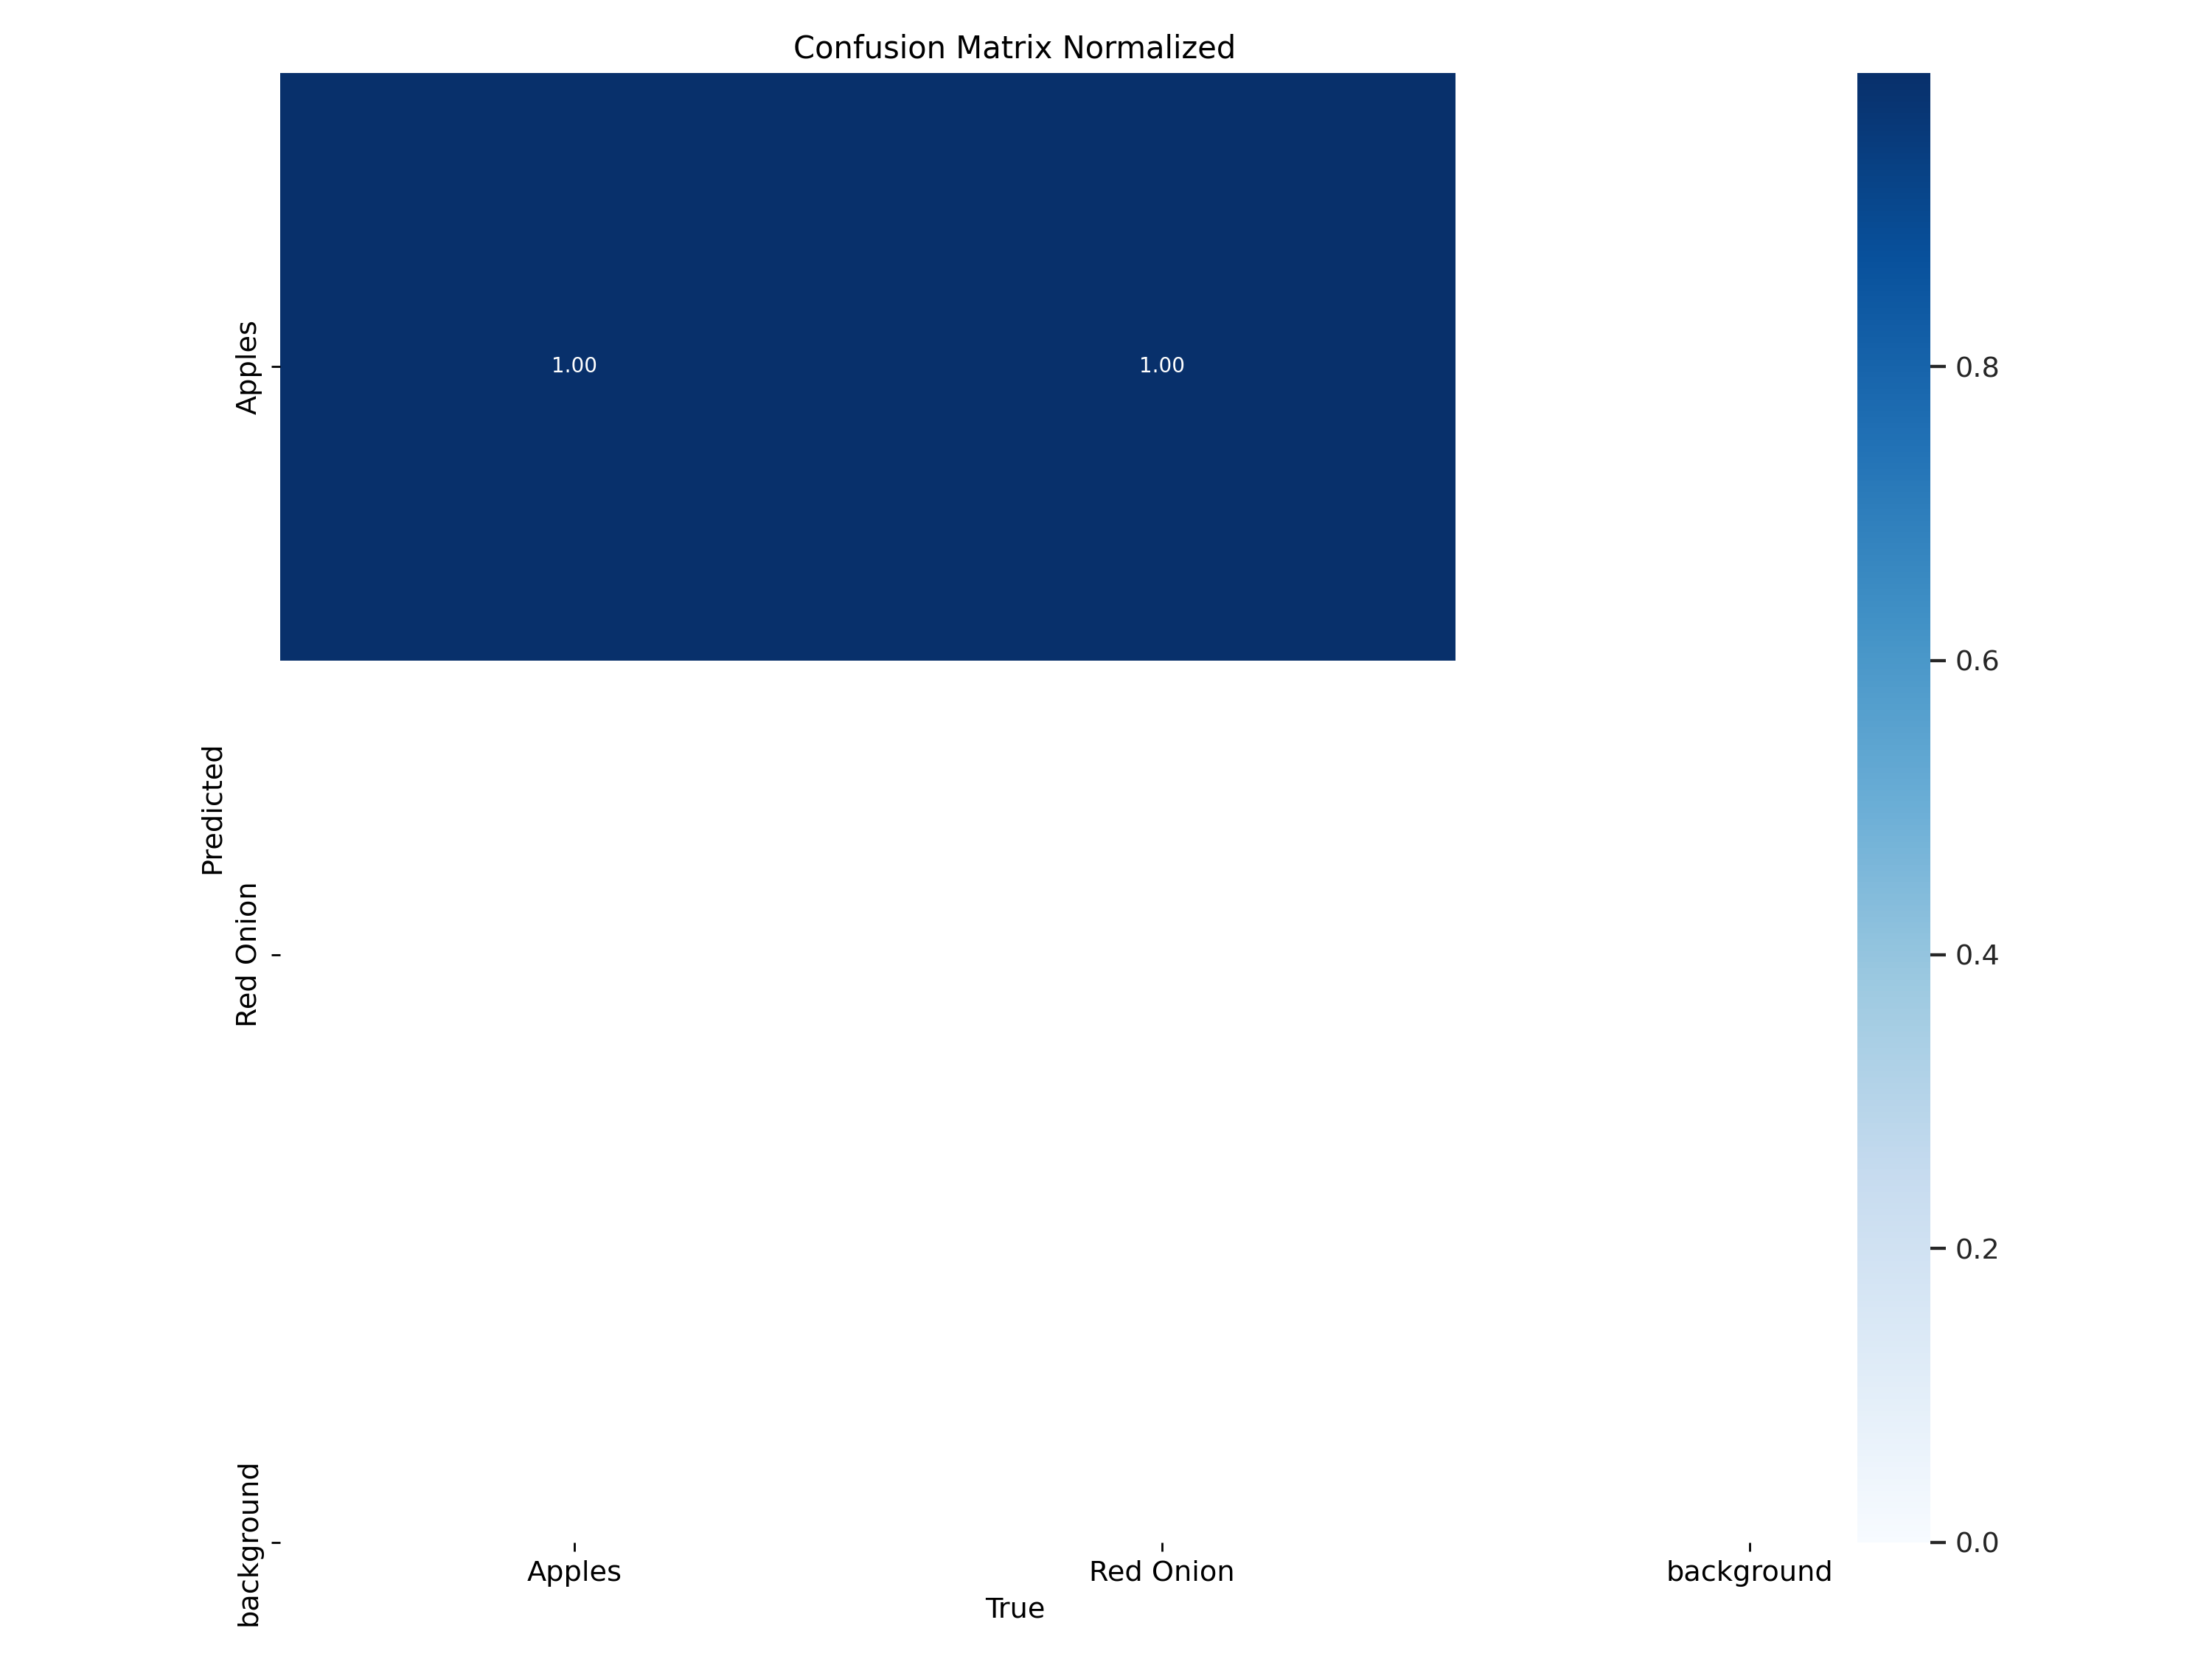

In [33]:
%matplotlib inline
from PIL import Image

#confusing matrix for train 1 (model 1, nano epochs=2,patience=5,batch=8, lr0=0.0005,imgsz=640)
Image.open('/content/drive/MyDrive/Colab Notebooks/Computer Vision/runs/classify/train/confusion_matrix_normalized.png')

##Prediction

Testing the model with a  random one off image

In [ ]:
#model 1 (nano, epochs=2, patience=5, batch=8, lr0=0.0005, imgsz=640)
results = model(' ', save=True)

for r in results:
  print(r.probs)

100%|██████████| 126k/126k [00:00<00:00, 580kB/s] 


image 1/1 /content/freshpoint-produce-101-apples-bananas.jpg: 576x640 2 apples, 3 bananas, 112.8ms
Speed: 1.8ms preprocess, 112.8ms inference, 1.7ms postprocess per image at shape (1, 3, 576, 640)
Results saved to runs/detect/predict
